# Kaggle Competiton

우선 EDA를 위해서 여러가지 Kernel에 voting많이 받은걸 참고하고자한다.

## Reference
[here](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

In [3]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df_train = pd.read_csv("./input/train.csv")

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df_train.columns.size

81

In [17]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [18]:
# most expensive house price is about 180k $

180921000

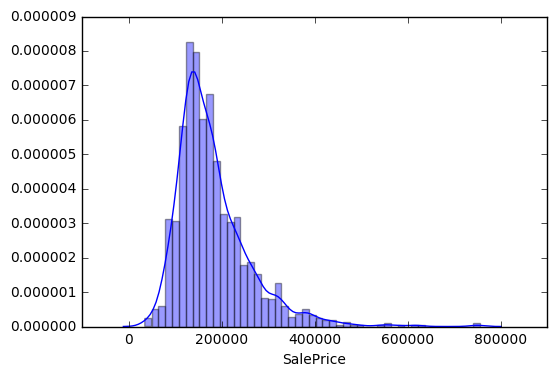

In [21]:
sns.distplot(df_train['SalePrice'])
# 아래 히스토그램 그림을 보면 정규 분포는 살짝 벗어나고 분명한 positive skewness (왼쪽으로 치우침)

In [22]:
# skewness and kurtosis
print("Skewness : %f" % df_train['SalePrice'].skew())
print("Kurtosis : %f" % df_train['SalePrice'].kurt())


Skewness : 1.882876
Kurtosis : 6.536282


In [25]:
var = 'GrLivArea'
df_train[var]
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)

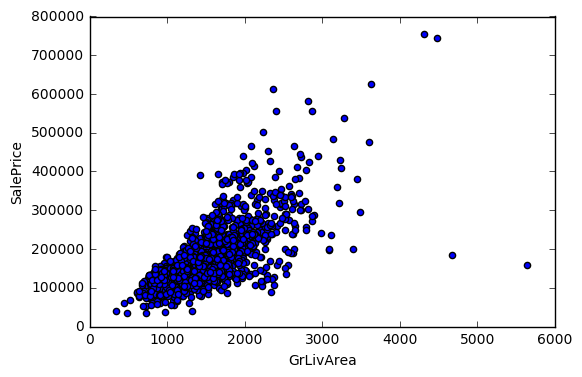

In [29]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

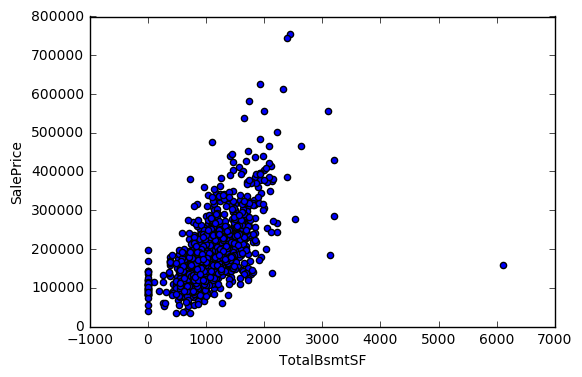

In [30]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0, 800000)

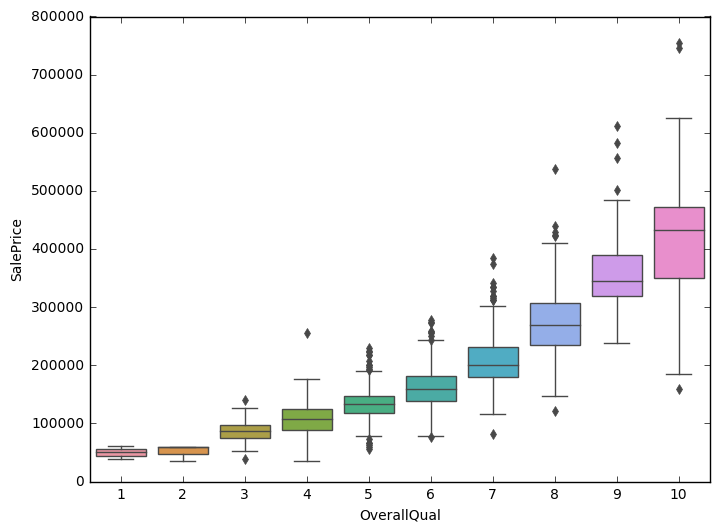

In [49]:
# 이제 분류범주의 피쳐를 들여다보자
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis= 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

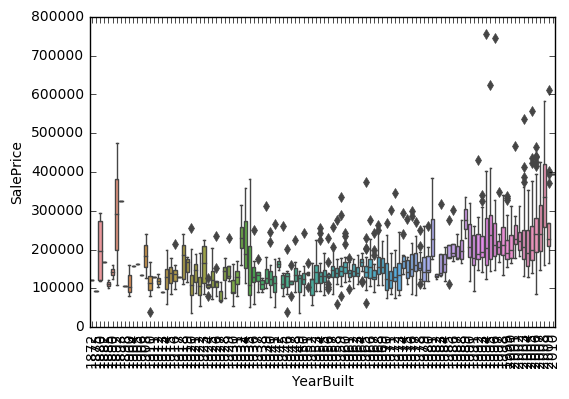

In [54]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
#f,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

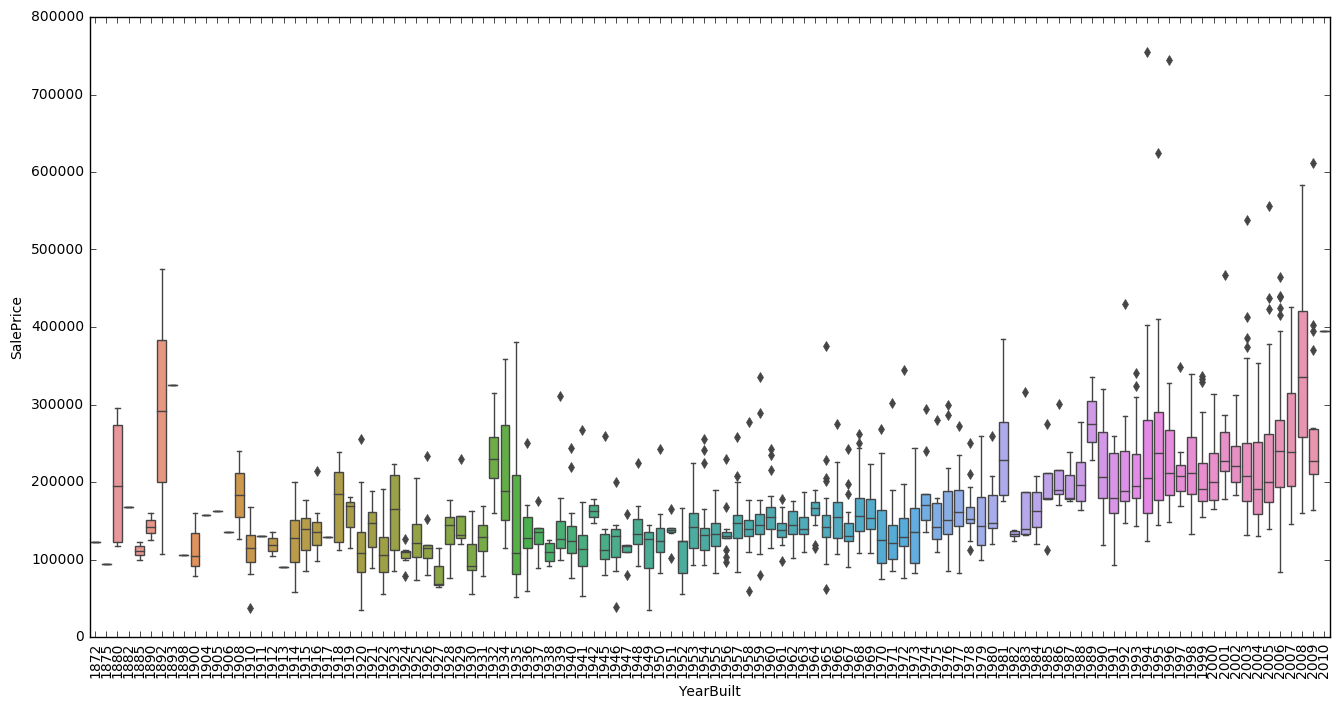

In [56]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

아파트가 무려 1872년도에 지은 아파트가 부동산에 나와있다는거 신기한듯 평균이 1971년도에 지은 아파트.. 한국에서 처음 지은 아파트가 아직 재건축되지 않았다면 최초의 아파트라는거.. 

여튼 이런 변수를 4개 살펴보았지만 let's separate the wheat from the chaff. 해보자고

In [136]:
df_train['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [137]:
# correlation matrix
corrmat = df_train.corr()
corrmat.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.026524,0.022314,0.116295,0.248541,-0.013444,0.149758,0.166523,0.125368,0.028290,0.073025,...,0.125326,0.137671,-0.019059,0.035275,0.060059,0.076355,0.028107,0.042215,0.014333,0.280582
std,0.170783,0.204051,0.186893,0.290141,0.201670,0.289234,0.243590,0.261163,0.183096,0.250763,...,0.191985,0.192394,0.198974,0.170322,0.172952,0.168661,0.170960,0.171248,0.175522,0.300545
min,-0.046635,-0.251758,-0.139781,-0.183882,-0.375983,-0.387268,-0.193919,-0.495251,-0.209294,-0.495251,...,-0.125989,-0.093079,-0.387268,-0.046635,-0.082864,-0.059689,-0.043080,-0.145721,-0.145721,-0.135907
25%,-0.017593,-0.052443,0.009284,0.001512,-0.083343,-0.024000,-0.002228,-0.030979,-0.039507,-0.029464,...,-0.004325,0.001308,-0.098891,-0.016175,-0.003388,0.014154,-0.018531,-0.007772,-0.031719,-0.014111
50%,0.001330,-0.012037,0.077672,0.238923,-0.023820,0.095589,0.119470,0.062021,-0.009640,0.028167,...,0.092165,0.093810,-0.024822,0.018645,0.043160,0.057044,-0.003793,0.023217,-0.014969,0.263843
75%,0.010826,0.036504,0.176050,0.507016,0.027223,0.265745,0.263884,0.231860,0.044315,0.198739,...,0.215196,0.219934,0.013737,0.033221,0.068656,0.079580,0.011982,0.038714,0.012527,0.528310
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


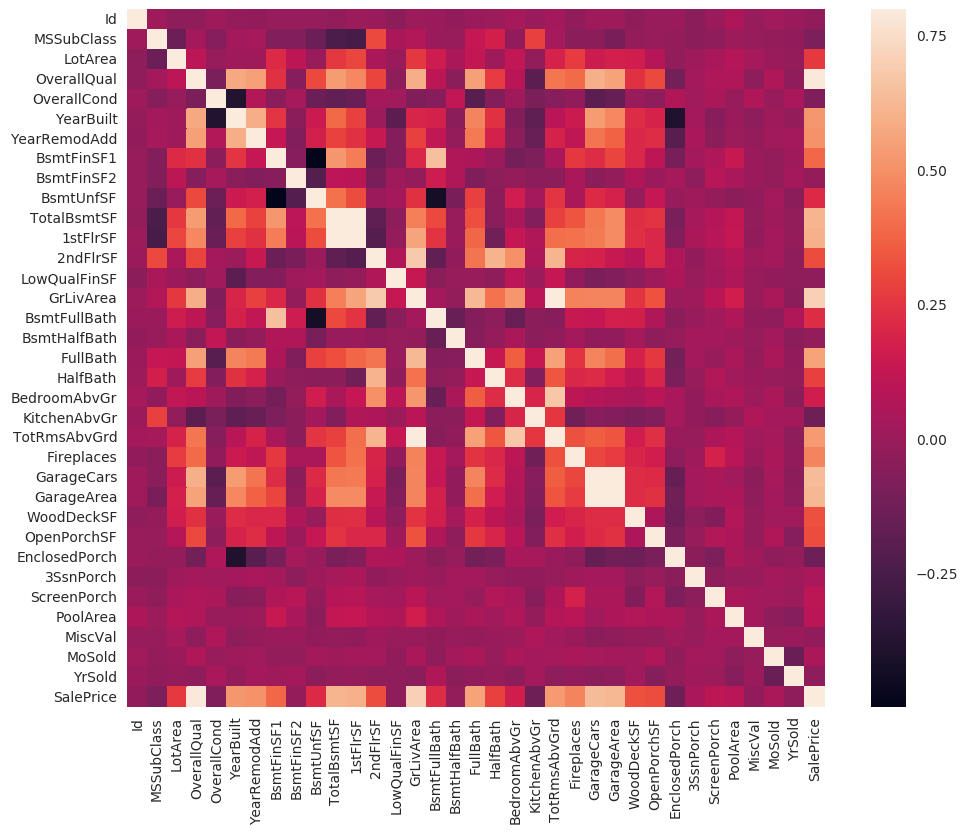

In [138]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [139]:
corrmat.size

1225

In [140]:
# saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

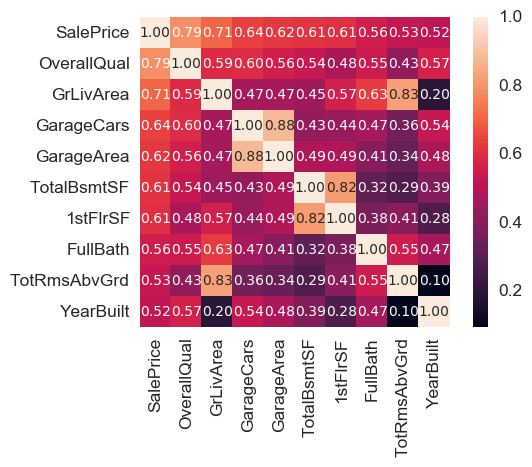

In [141]:
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', \
                 annot_kws={'size':10}, yticklabels=cols.values,\
                 xticklabels=cols.values)
plt.show()

여기에서 보면 GarageArea 와 GarageCars를 보면 원인>결과 느낌이라서 하나만 유지 GarageCars가 더 상관관계가 있으므로. TotalBsmtSF와 1stFLoor도 동일한 케이스므로 TotalBsmtSF 유지. 그리고 FullBath는 흠?? 그리고 YearBuilt같은 경우는 관련이 있어보이긴 한데 이건 시계열 분석이 들어가야할 거 같아 더 고민이 필요.

In [142]:
cols.values

array(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'], dtype=object)

In [143]:
sns.set()
cols  = cols - ['GarageArea','1stFloor','TotRmsAbvGrd','TotRmsAbvGrd','1stFlrSF']
print(cols)

Index(['FullBath', 'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice',
       'TotalBsmtSF', 'YearBuilt'],
      dtype='object')


In [144]:
cols.size

7

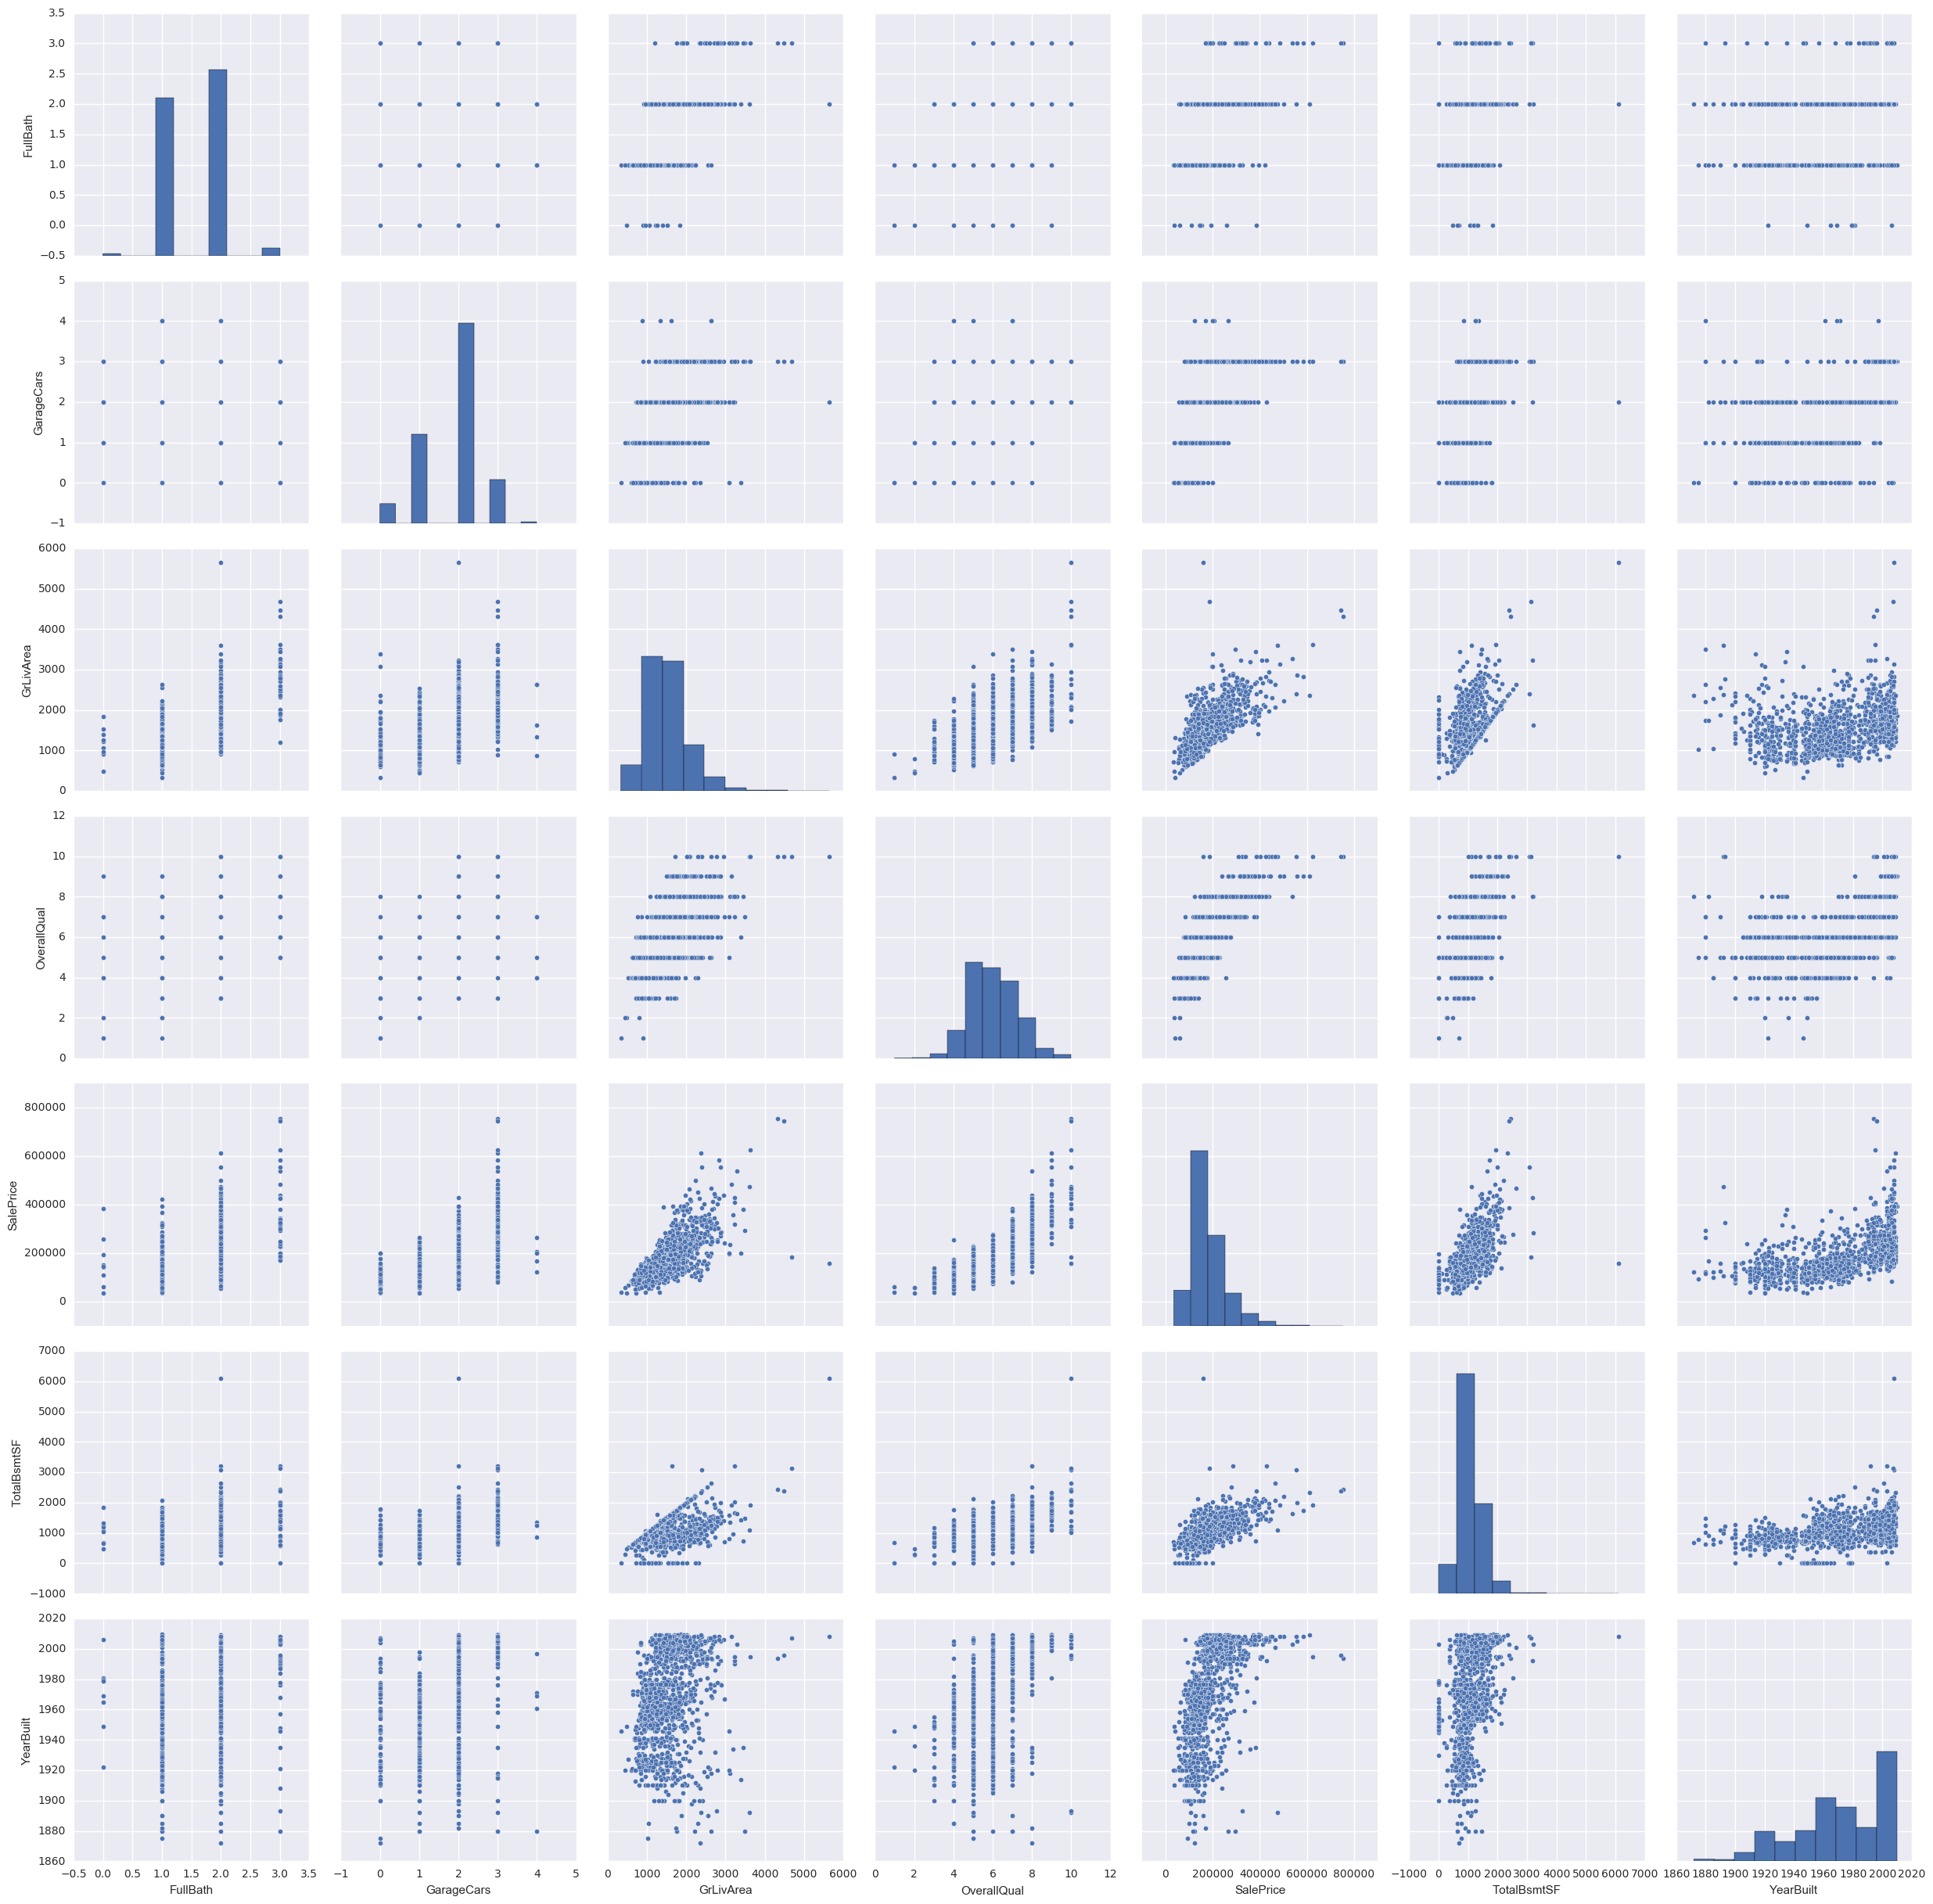

In [145]:
# r에서 graphics::pairs(~PIQ+Brain+Height+Weight, data=df, main="Scatterplot Matrix for Brain") 유사
sns.pairplot(df_train[cols], size=3.5)
#sns.set(font_scale=2.25)
plt.show()

여기에서 YearBuilt와 SalePrice의 관계를 보면 좀 exponential그래프가 생각나지 않는가?
그다음으로는 미싱데이터를 찾으러 가보자 

미싱데이터의 경우는 
어떻게 얼마나 미싱데이터가 많은지 데이터의 손실 정도를 체크하고 미싱 데이터에 대한 패턴을 파악해서
그 정도를 최소화 하는게 목표가 되겠다.

In [146]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
print(total.head())

Electrical    1
SalePrice     0
Heating       0
BsmtUnfSF     0
BsmtFinSF2    0
dtype: int64


In [147]:
count = df_train.isnull().count()
print(count.head())

Id            1460
MSSubClass    1460
MSZoning      1460
LotArea       1460
Street        1460
dtype: int64


In [148]:
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
Electrical,1,0.000685
SalePrice,0,0.000000
Heating,0,0.000000
BsmtUnfSF,0,0.000000
BsmtFinSF2,0,0.000000
BsmtFinSF1,0,0.000000
Foundation,0,0.000000
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior2nd,0,0.000000


여기 미싱 데이터가 많은 컬럼 기준으로 내림차순 정렬해서 보면 통상 15프로 이하는 버리는걸로 생각하면
PoolQC, MiscFeature, Alle, Fence, FireplaceQu, LotFrontage정도는 깔끔하게 버려주고  Garage로 시작하는
모든 컬럼은 같은 missing value count를 가지고 있다. 100프로 같은 rows가 같이 없는 것일것이다. 그리고 
이 데이터는 5프로 정도 소실이 있지만 걍 GarageCar를 대표변수로 세울꺼기 때문에 걍 다 날리자. 마찬가지로 
Bsmt로 시작하는 변수 또한 2.5프로 정도 손실이 있어 사용가능하지만 TotalBsmtSF를 세울꺼라 걍 날리자!
마지막으로 YearBuilt/OverallQual과 MasVnrArea/MasVnrType의 상관관계가 강하며 중요도도 없기 때문에
제거한다. 마지막으로 Electrical은 변수를 유지하고 데이터가 null인건 걍 날린다... 전체중에  0.6프로잉께

In [149]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

# 아웃라이어

아웃라이어 제거를 위해서 데이터를 표준화한다. 즉 data 값을 0기준의 mean과 표준편차 1로 변환해보자

In [169]:
# standardizing data
saleprice_scaled = StandardScaler().fit_transform( df_train['SalePrice'][:,np.newaxis]) ;
saleprice_scaled[:,0].argsort()

array([ 495,  916,  968, ..., 1169, 1182,  691], dtype=int64)

In [170]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10] 
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:] 
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


표준분산을 취했음에도 .. 가장 작은 값들은 0에서 너무 멀지 않고 높은 값들은 0에서 멀다. 

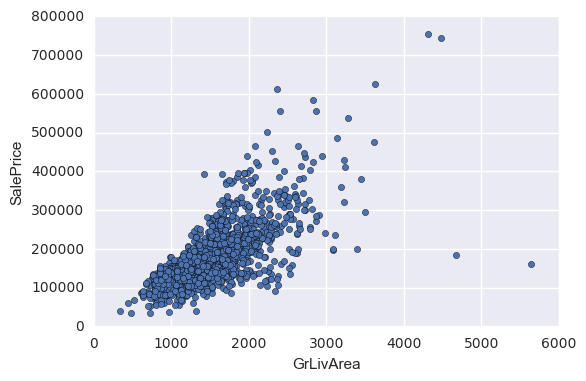

In [171]:
# bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

그래서 여기에서보면 오른쪽 2개의 점은 위의 7로 시작하는 이상한 가격 거실 면적이 넓어도 이모냥이냐?

In [172]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending= False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [174]:
#deleting two points
df_train = df_train.drop(df_train[df_train['Id']==1298].index)
df_train = df_train.drop(df_train[df_train['Id'] ==523].index)

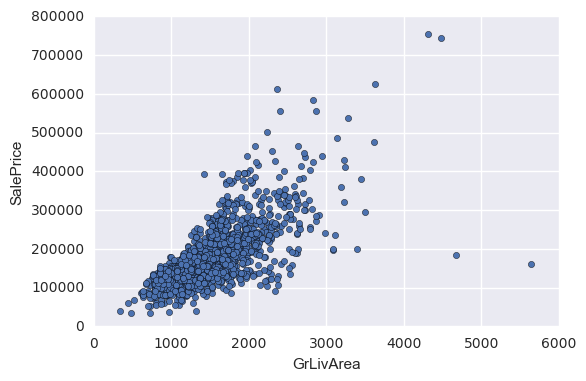

In [175]:
# bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

다변량 분석을 위해서 가능한 통계적인 추론으로 SalesPrice를 어떻게 이해할건지 딥다이브!

Normality : 표준 분산을 따르면 좋다는 의미! t-검정같이 표본이 없을때 쓰는 경우도 존재하며 200개의 observations가 있는 큰 샘플에서는 이러한 이슈를 고려할 필요가 없다고? 이 normality가 해결된다면 많은 다른 문제를 해결할 수 있다.

Hormoscedasticity : 동분성이라 어렵다 이거 머신러닝할때도 비슷한 개념으로 나오며 즉 독립변수별로 분산의 정도가 동일해야 한다 이런 비슷한말로 해서글 하지 않을까 싶다. 

Linearity : 이건 뭐 흔한 개념이며 플랏을 찍어봤을때 어떤 방향을 갖는 패턴이 보야야 한다. Linear가 안보인다면 transformation이 필요하다고 

Absense of correlated errors  : 에러가 연쇄적으로 일어난다?



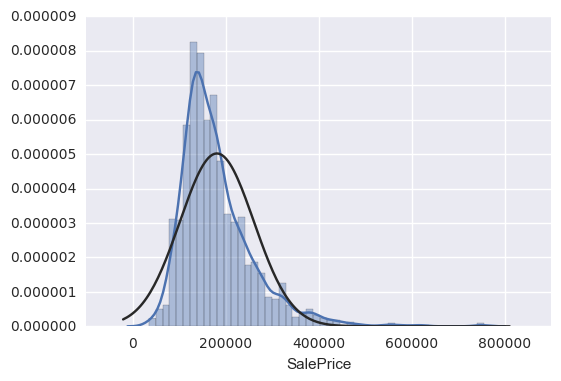

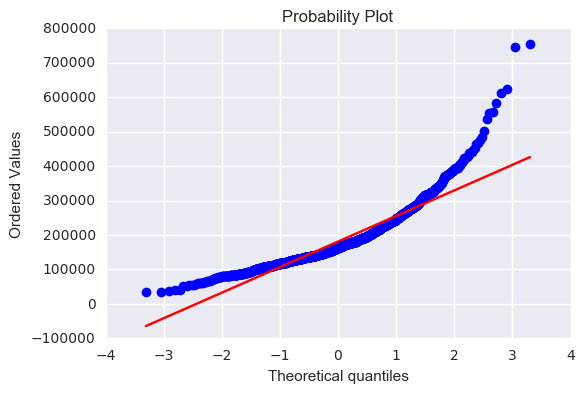

In [176]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

여기 salesprice는 표준분산도 안따르고 그리고 diagonal또한 따르지 않지만 간단한 data transformation으로 이를 해결가능.  log transformations을 적용해보자.  

In [177]:
# applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

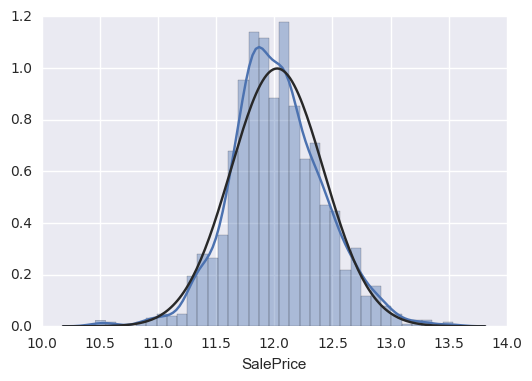

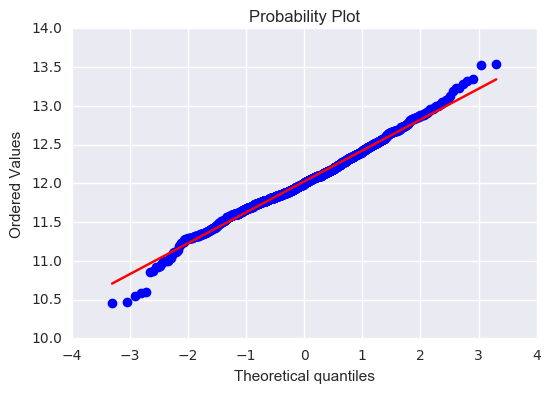

In [178]:
# transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

여기 신기하게 linear 로 바뀐다. 단지 log tranform을 했을뿐인데

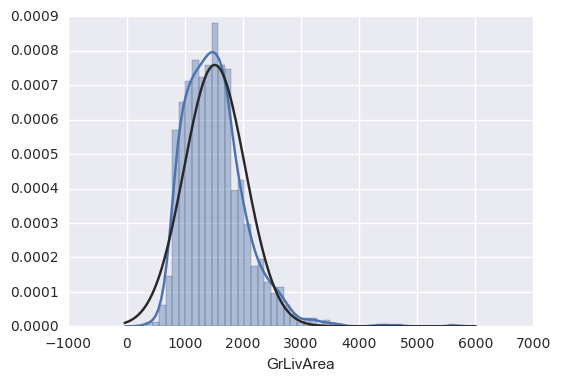

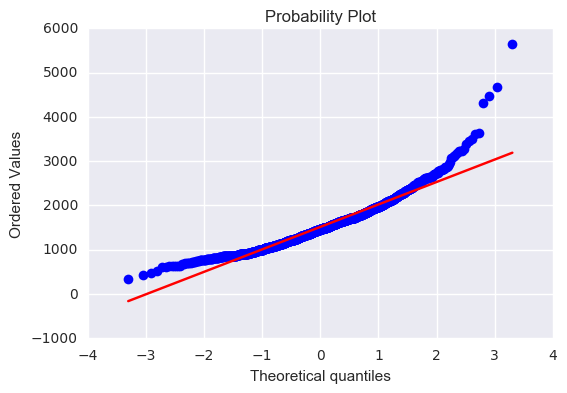

In [184]:
# histrogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

이건 그냥 뭐 잘 맞는거 같은데 그래도 log를 취한다. 

In [185]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

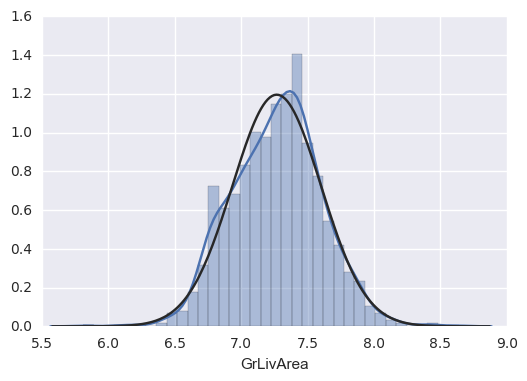

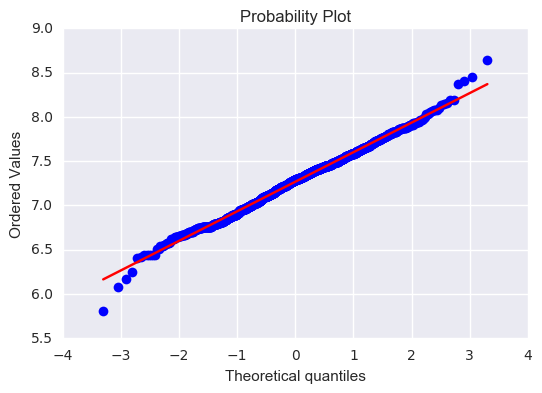

In [186]:
# histrogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

역시 이쁘게 바꼈구나 log의 힘이란 ㅎㅎ

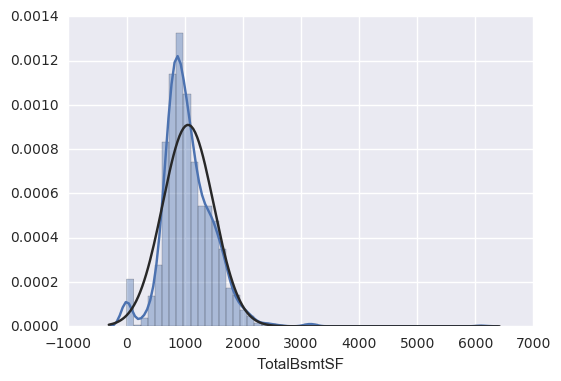

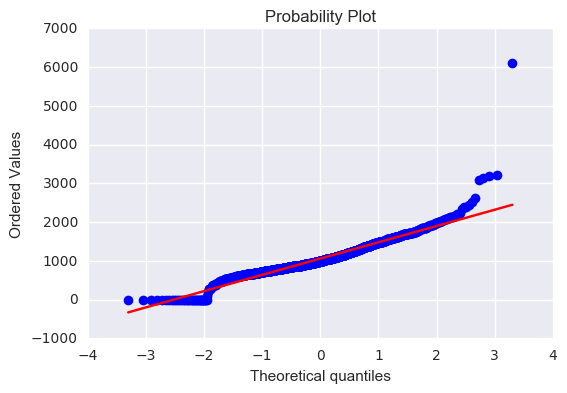

In [187]:
# histrogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [200]:
#df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train[df_train['TotalBsmtSF'] == 0]['TotalBsmtSF'].count()

37

In [204]:
df_train.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1457)

In [206]:
type(df_train)

pandas.core.frame.DataFrame

In [207]:
# create column for new variables( one is enough becasue it's a binary categorical feature)
# if area > 0 it gets 1, for area ==0 it gets 0
pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1

 여기에서 보면 37개의 0 value 즉 지하실이 없는 집도 있기에 이 같은 경우는 log 값을 취할 수가 없다. 그래서 별도의 변수를 만들어서 binary변수로 지하 공간 존재여부를 나누고 없는 경우는 위의 정규분포를 그릴때 제외를 시켜보자.

In [208]:
# transform data
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

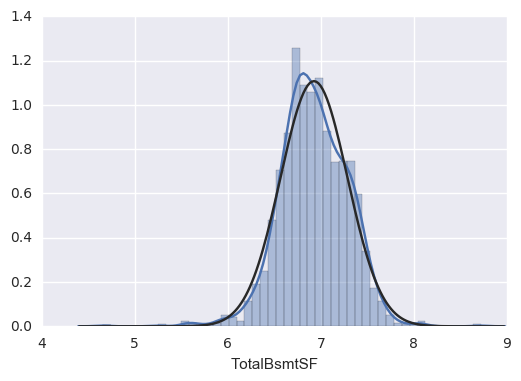

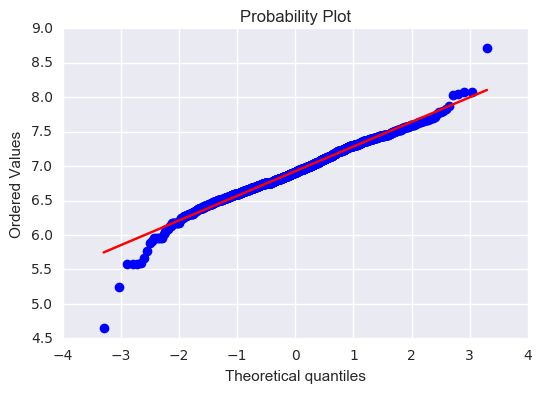

In [209]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

오 신기하네 로그도 안추했는데 37개의 데이터를 제외하고 분포를 그리면 또 이리 잘 맞아떨어진다.

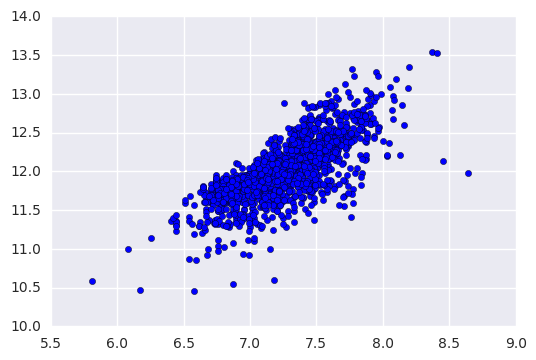

In [210]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

이전 버젼의 scatter plot보다는 원뿔로 넓은 부분이 우상향으로 뻗어나가는 확산되는 느낌이었다면 이제 linear한 느낌을 주는 플롯으로 바뀌었다. log같은 함수의 transform과 outlier등의 제거등을 통해서 우리가 normality을 확보했고 hormoscedasticity 문제를 풀었다고 볼수 있다.

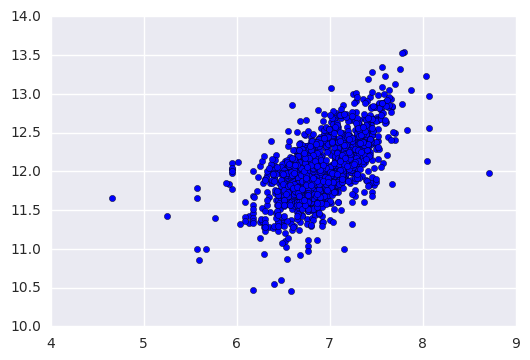

In [211]:
# scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

마찬가지로 지하면적(TotalBsmtSF) 또한 같은 분산을 보여주고 있다. 쿨~!
마지막으로 아래는 pandas에서 get_dummeis()라는 함수로 categorical 변수를 dummy/indicator variables로 바꿔주는 간단한 함수라고 함. [API 참고](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) 

In [212]:
# convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [213]:
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
